# Exercise

1. Spam Data
    - a. Load the spam data set.
    - b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    - c. Is there any overlap in the bigrams for the spam data and the ham data?
    - d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

<br>

2. Explore the blog articles using the techniques discussed in the exploration lesson.

<br>

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re
import seaborn as sns
import acquire
import prepare
from wordcloud import WordCloud

In [2]:
def clean(text):
    '''
    This function is a simplified text cleaning function
    '''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

<hr style="border:2px solid black"> </hr>

### #1. Spam Data

#### #1a. Load the spam data set

In [3]:
#read in the csv
df = pd.read_csv('./spam_clean.csv')

#look at shape
print(df.shape)

#look at data
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#real texts
ham_words = clean(' '.join(df[df.label == 'ham'].text))

#spam messages
spam_words = clean(' '.join(df[df.label == 'spam'].text))

#all messages
all_words = clean(' '.join(df.text))

In [5]:
#create a series with words split and value counts for each word
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [6]:
#combine all frequency into single Series
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

#word count for each text type
word_counts.columns = ['ham', 'spam', 'all']

#take a look
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


#### #1b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?  

In [7]:
#put list of two word combos together
list(nltk.bigrams(ham_words.split()))

[('go', 'until'),
 ('until', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'only'),
 ('only', 'in'),
 ('in', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'there'),
 ('there', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'u'),
 ('u', 'oni'),
 ('oni', 'u'),
 ('u', 'dun'),
 ('dun', 'say'),
 ('say', 'so'),
 ('so', 'early'),
 ('early', 'hor'),
 ('hor', 'u'),
 ('u', 'c'),
 ('c', 'already'),
 ('already', 'then'),
 ('then', 'say'),
 ('say', 'nah'),
 ('nah', 'i'),
 ('i', 'dont'),
 ('dont', 'think'),
 ('think', 'he'),
 ('he', 'goes'),
 ('goes', 'to'),
 ('to', 'usf'),
 ('usf', 'he'),
 ('he', 'lives'),
 ('lives', 'around'),
 ('around', 'here'),
 ('here', 'though'),
 ('though', 'even'),
 ('even', 'my'),
 ('my', 'brother'),
 ('brother', 'is'),
 ('is', 'not'),
 ('not', 'lik

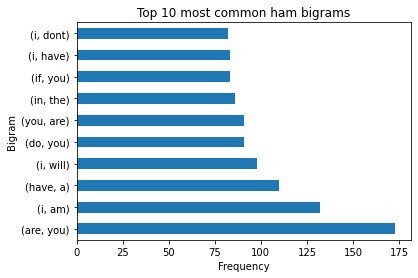

In [8]:
#visualize top ten
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

In [9]:
bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10)
bigrams

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)      98
(do, you)      91
(you, are)     91
(in, the)      86
(if, you)      83
(i, have)      83
(i, dont)      82
dtype: int64

(-0.5, 799.5, 599.5, -0.5)

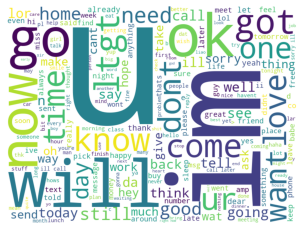

In [10]:
img = WordCloud(background_color='white', width=800, height=600).generate(ham_words)
plt.imshow(img)
plt.axis('off')

#### #1c. Is there any overlap in the bigrams for the spam data and the ham data?

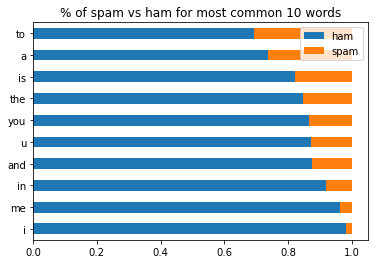

In [11]:
#visualize only ham and spam as percent of 'all'
(word_counts.sort_values(by='all', ascending=False)
 .head(10)
 .apply(lambda row: row/ row['all'],axis=1)
 .drop(columns='all')
 .sort_values(by='spam')
 .plot.barh(stacked=True))
plt.title('% of spam vs ham for most common 10 words')
None

#### #1d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [12]:
#put list of two word combos together
list(nltk.trigrams(ham_words.split()))

[('go', 'until', 'jurong'),
 ('until', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'only'),
 ('available', 'only', 'in'),
 ('only', 'in', 'bugis'),
 ('in', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'there'),
 ('cine', 'there', 'got'),
 ('there', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'u'),
 ('wif', 'u', 'oni'),
 ('u', 'oni', 'u'),
 ('oni', 'u', 'dun'),
 ('u', 'dun', 'say'),
 ('dun', 'say', 'so'),
 ('say', 'so', 'early'),
 ('so', 'early', 'hor'),
 ('early', 'hor', 'u'),
 ('hor', 'u', 'c'),
 ('u', 'c', 'already'),
 ('c', 'already', 'then'),
 ('already', 'then', 'say'),
 ('then', 'say', 'nah'),
 ('say', 'nah', 'i'),
 ('nah', 'i', 'dont'),
 ('i', 'dont', 'think'

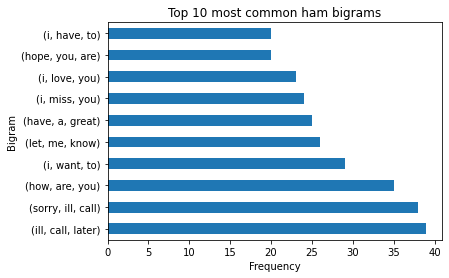

In [13]:
#visualize top ten
pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

<hr style="border:2px solid black"> </hr>

### #2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [14]:
#acquiring blog articles
urls = ['https://codeup.com/codeups-data-science-career-accelerator-is-here/', 
        'https://codeup.com/data-science-myths/', 
        'https://codeup.com/data-science-vs-data-analytics-whats-the-difference/', 
        'https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair/', 
        'https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger/']

codeup_df = pd.DataFrame(acquire.get_blog_articles(urls))

codeup_df

/Users/natasharivers/codeup-data-science/database-exercises/NLP/acquire.py:16: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 16 of the file /Users/natasharivers/codeup-data-science/database-exercises/NLP/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


,title,published_date,blog_image,content
0,Codeup’s Data Science Career Accelerator is Here!,"September 30, 2018",https://codeup.com/wp-content/uploads/2018/10/...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,"October 31, 2018",https://codeup.com/wp-content/uploads/2018/10/...,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",https://codeup.com/wp-content/uploads/2018/10/...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair,"August 14, 2018",None,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",None,Competitor Bootcamps Are Closing. Is the Model...


In [15]:
#applying clean function to get all normalized text in content column
all_words = clean(' '.join(codeup_df.content))
all_words

'the rumors are true the time has arrived codeup has officially opened applications to our new data science career accelerator with only 25 seats available this immersive program is one of a kind in san antonio and will help you land a job in glassdoors 1 best job in america\ndata science is a method of providing actionable intelligence from data the data revolution has hit san antonio resulting in an explosion in data scientist positions across companies like usaa accenture booz allen hamilton and heb weve even seen utsa invest 70 m for a cybersecurity center and school of data science we built a program to specifically meet the growing demands of this industry\nour program will be 18 weeks long fulltime handson and projectbased our curriculum development and instruction is led by senior data scientist maggie giust who has worked at heb capital group and rackspace along with input from dozens of practitioners and hiring partners students will work with real data sets realistic problem

In [16]:
#split the string into individual words
all_words.split()

['the',
 'rumors',
 'are',
 'true',
 'the',
 'time',
 'has',
 'arrived',
 'codeup',
 'has',
 'officially',
 'opened',
 'applications',
 'to',
 'our',
 'new',
 'data',
 'science',
 'career',
 'accelerator',
 'with',
 'only',
 '25',
 'seats',
 'available',
 'this',
 'immersive',
 'program',
 'is',
 'one',
 'of',
 'a',
 'kind',
 'in',
 'san',
 'antonio',
 'and',
 'will',
 'help',
 'you',
 'land',
 'a',
 'job',
 'in',
 'glassdoors',
 '1',
 'best',
 'job',
 'in',
 'america',
 'data',
 'science',
 'is',
 'a',
 'method',
 'of',
 'providing',
 'actionable',
 'intelligence',
 'from',
 'data',
 'the',
 'data',
 'revolution',
 'has',
 'hit',
 'san',
 'antonio',
 'resulting',
 'in',
 'an',
 'explosion',
 'in',
 'data',
 'scientist',
 'positions',
 'across',
 'companies',
 'like',
 'usaa',
 'accenture',
 'booz',
 'allen',
 'hamilton',
 'and',
 'heb',
 'weve',
 'even',
 'seen',
 'utsa',
 'invest',
 '70',
 'm',
 'for',
 'a',
 'cybersecurity',
 'center',
 'and',
 'school',
 'of',
 'data',
 'science',


In [17]:
#turn all words into a series
#get value count of all words
pd.Series(all_words.split()).value_counts()

#removing stopwords would change this count

the          95
and          81
data         75
to           75
a            60
             ..
mentioned     1
employees     1
upstarts      1
america       1
wall          1
Length: 955, dtype: int64

In [18]:
article = prepare.remove_stopwords(all_words)
article

'rumors true time arrived codeup officially opened applications new data science career accelerator 25 seats available immersive program one kind san antonio help land job glassdoors 1 best job america data science method providing actionable intelligence data data revolution hit san antonio resulting explosion data scientist positions across companies like usaa accenture booz allen hamilton heb weve even seen utsa invest 70 cybersecurity center school data science built program specifically meet growing demands industry program 18 weeks long fulltime handson projectbased curriculum development instruction led senior data scientist maggie giust worked heb capital group rackspace along input dozens practitioners hiring partners students work real data sets realistic problems entire data science pipeline collection deployment receive professional development training resume writing interviewing continuing education prepare smooth transition workforce focus applied data science immediate 

In [19]:
#turn all words into a series
#get value count of all words (after stopwords removed)
pd.Series(article.split()).value_counts()

data         75
science      26
learning     20
machine      14
job          13
             ..
overboard     1
insert        1
7             1
april         1
wall          1
Length: 861, dtype: int64

In [20]:
#assign to a variable
word_freq = pd.Series(article.split()).value_counts()

In [21]:
word_freq.head()

data        75
science     26
learning    20
machine     14
job         13
dtype: int64

Text(0, 0.5, 'Word')

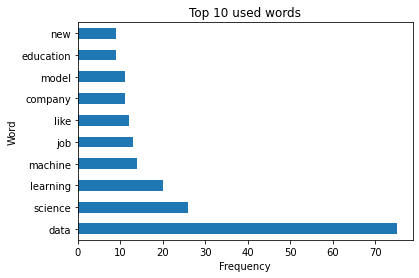

In [22]:
#visualize top 10
word_freq.head(10).plot.barh()

plt.title('Top 10 used words')
plt.xlabel('Frequency')
plt.ylabel('Word')

In [23]:
#put list of two word combos together
list(nltk.bigrams(article.split()))

[('rumors', 'true'),
 ('true', 'time'),
 ('time', 'arrived'),
 ('arrived', 'codeup'),
 ('codeup', 'officially'),
 ('officially', 'opened'),
 ('opened', 'applications'),
 ('applications', 'new'),
 ('new', 'data'),
 ('data', 'science'),
 ('science', 'career'),
 ('career', 'accelerator'),
 ('accelerator', '25'),
 ('25', 'seats'),
 ('seats', 'available'),
 ('available', 'immersive'),
 ('immersive', 'program'),
 ('program', 'one'),
 ('one', 'kind'),
 ('kind', 'san'),
 ('san', 'antonio'),
 ('antonio', 'help'),
 ('help', 'land'),
 ('land', 'job'),
 ('job', 'glassdoors'),
 ('glassdoors', '1'),
 ('1', 'best'),
 ('best', 'job'),
 ('job', 'america'),
 ('america', 'data'),
 ('data', 'science'),
 ('science', 'method'),
 ('method', 'providing'),
 ('providing', 'actionable'),
 ('actionable', 'intelligence'),
 ('intelligence', 'data'),
 ('data', 'data'),
 ('data', 'revolution'),
 ('revolution', 'hit'),
 ('hit', 'san'),
 ('san', 'antonio'),
 ('antonio', 'resulting'),
 ('resulting', 'explosion'),
 ('exp

In [24]:
#see most common bigrams 
pd.Series(nltk.bigrams(article.split())).value_counts()

(data, science)            26
(machine, learning)        14
(data, scientist)           8
(job, fair)                 7
(data, scientists)          5
                           ..
(plausible, category)       1
(regression, 6)             1
(handson, projectbased)     1
(engineering, machine)      1
(run, bootcamps)            1
Length: 1420, dtype: int64

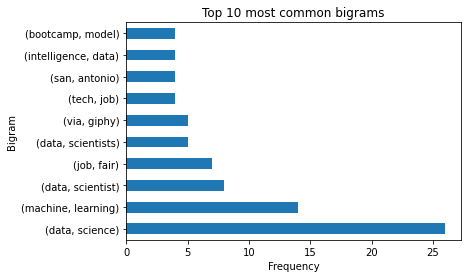

In [25]:
#visualize top ten
pd.Series(nltk.bigrams(article.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

(-0.5, 799.5, 599.5, -0.5)

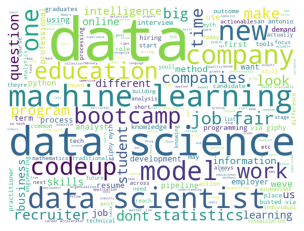

In [26]:
img = WordCloud(background_color='white', width=800, height=600).generate(article)
plt.imshow(img)
plt.axis('off')

<hr style="border:2px solid black"> </hr>

### #3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [27]:
news = acquire.acquire_news_articles()

/Users/natasharivers/codeup-data-science/database-exercises/NLP/acquire.py:92: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 92 of the file /Users/natasharivers/codeup-data-science/database-exercises/NLP/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


In [28]:
news

,title,content,category
0,"Reliance Industries vaccinates 98% of workers,...",Reliance Industries has said in a statement th...,business
1,I will most likely not be on future earnings c...,Tesla CEO and the world's second-richest perso...,business
2,"Musk criticises Apple's 'walled garden', cobal...",Tesla's billionaire CEO Elon Musk criticised A...,business
3,Speculation around our plans for crypto not tr...,Amazon on Monday denied speculations that it w...,business
4,Factually incorrect: INOX on report of Amazon ...,INOX Leisure denied a report that claimed Amaz...,business
...,...,...,...
143,China's claims in South China Sea have no basi...,China's territorial claims in the South China ...,world
144,Will continue to support Afghanistan after tro...,NATO Secretary-General Jens Stoltenberg on Tue...,world
145,Hundreds killed in attack in Ethiopia's Somali...,Hundreds of civilians have been killed in Ethi...,world
146,Samoa's first female PM takes office after con...,Samoa's first female PM Fiame Naomi Mata'afa t...,world


In [29]:
#applying clean function to get all normalized text in content column
all_words = clean(' '.join(news.content))
all_words

'reliance industries has said in a statement that over 98 of its workers have received at least one dose of covid19 vaccine so far the billionaire mukesh ambaniled conglomerate had over 236 lakh employees of march 31 besides reliance hindustan unilever has also given at least one shot to 90 of employees while infosys inoculated 59 employees and tcs 70 tesla ceo and the worlds secondrichest person elon musk during his companys secondquarter earnings call on monday said i will no longer default to doing earnings call he added obviously ill do the annual shareholder meeting but i think that going forward ill most likely not be on earnings calls unless theres something really important that i need to say teslas billionaire ceo elon musk criticised apple twice during an earnings call that took place on monday in a reference to apple musk said teslas goal is to support sustainable energy not to create a walled garden used by some companies to bludgeon competitors he also explained that while

In [30]:
#split the string into individual words
all_words.split()

['reliance',
 'industries',
 'has',
 'said',
 'in',
 'a',
 'statement',
 'that',
 'over',
 '98',
 'of',
 'its',
 'workers',
 'have',
 'received',
 'at',
 'least',
 'one',
 'dose',
 'of',
 'covid19',
 'vaccine',
 'so',
 'far',
 'the',
 'billionaire',
 'mukesh',
 'ambaniled',
 'conglomerate',
 'had',
 'over',
 '236',
 'lakh',
 'employees',
 'of',
 'march',
 '31',
 'besides',
 'reliance',
 'hindustan',
 'unilever',
 'has',
 'also',
 'given',
 'at',
 'least',
 'one',
 'shot',
 'to',
 '90',
 'of',
 'employees',
 'while',
 'infosys',
 'inoculated',
 '59',
 'employees',
 'and',
 'tcs',
 '70',
 'tesla',
 'ceo',
 'and',
 'the',
 'worlds',
 'secondrichest',
 'person',
 'elon',
 'musk',
 'during',
 'his',
 'companys',
 'secondquarter',
 'earnings',
 'call',
 'on',
 'monday',
 'said',
 'i',
 'will',
 'no',
 'longer',
 'default',
 'to',
 'doing',
 'earnings',
 'call',
 'he',
 'added',
 'obviously',
 'ill',
 'do',
 'the',
 'annual',
 'shareholder',
 'meeting',
 'but',
 'i',
 'think',
 'that',
 'goin

In [31]:
#turn all words into a series
#get value count of all words
pd.Series(all_words.split()).value_counts()

#removing stopwords would change this count

the             452
to              223
in              194
of              185
and             179
               ... 
jumped            1
civilisation      1
24356             1
popups            1
leaders           1
Length: 2882, dtype: int64

In [32]:
news_df = prepare.remove_stopwords(all_words)
news_df

'reliance industries said statement 98 workers received least one dose covid19 vaccine far billionaire mukesh ambaniled conglomerate 236 lakh employees march 31 besides reliance hindustan unilever also given least one shot 90 employees infosys inoculated 59 employees tcs 70 tesla ceo worlds secondrichest person elon musk companys secondquarter earnings call monday said longer default earnings call added obviously ill annual shareholder meeting think going forward ill likely earnings calls unless theres something really important need say teslas billionaire ceo elon musk criticised apple twice earnings call took place monday reference apple musk said teslas goal support sustainable energy create walled garden used companies bludgeon competitors also explained apple uses almost 100 cobalt batteries tesla uses much lesser amazon monday denied speculations looking accept bitcoin cryptocurrencies form payment end year saying speculations true speculations regarding fuelled amazon job postin

In [33]:
#turn all words into a series
#get value count of all words
pd.Series(news_df.split()).value_counts()

#removing stopwords would change this count

said       101
added       37
india       29
tuesday     27
first       23
          ... 
running      1
french       1
ursula       1
cancers      1
leaders      1
Length: 2769, dtype: int64

In [34]:
#assign to a variable
news_freq = pd.Series(news_df.split()).value_counts()
news_freq.head()

said       101
added       37
india       29
tuesday     27
first       23
dtype: int64

Text(0, 0.5, 'Word')

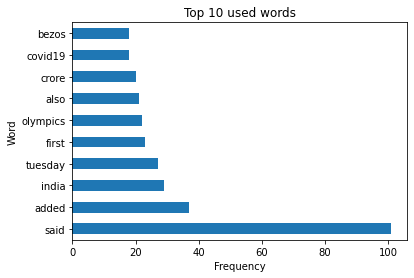

In [35]:
#visualize top 10
news_freq.head(10).plot.barh()

plt.title('Top 10 used words')
plt.xlabel('Frequency')
plt.ylabel('Word')

In [36]:
#put list of two word combos together
list(nltk.bigrams(news_df.split()))

[('reliance', 'industries'),
 ('industries', 'said'),
 ('said', 'statement'),
 ('statement', '98'),
 ('98', 'workers'),
 ('workers', 'received'),
 ('received', 'least'),
 ('least', 'one'),
 ('one', 'dose'),
 ('dose', 'covid19'),
 ('covid19', 'vaccine'),
 ('vaccine', 'far'),
 ('far', 'billionaire'),
 ('billionaire', 'mukesh'),
 ('mukesh', 'ambaniled'),
 ('ambaniled', 'conglomerate'),
 ('conglomerate', '236'),
 ('236', 'lakh'),
 ('lakh', 'employees'),
 ('employees', 'march'),
 ('march', '31'),
 ('31', 'besides'),
 ('besides', 'reliance'),
 ('reliance', 'hindustan'),
 ('hindustan', 'unilever'),
 ('unilever', 'also'),
 ('also', 'given'),
 ('given', 'least'),
 ('least', 'one'),
 ('one', 'shot'),
 ('shot', '90'),
 ('90', 'employees'),
 ('employees', 'infosys'),
 ('infosys', 'inoculated'),
 ('inoculated', '59'),
 ('59', 'employees'),
 ('employees', 'tcs'),
 ('tcs', '70'),
 ('70', 'tesla'),
 ('tesla', 'ceo'),
 ('ceo', 'worlds'),
 ('worlds', 'secondrichest'),
 ('secondrichest', 'person'),
 ('pe

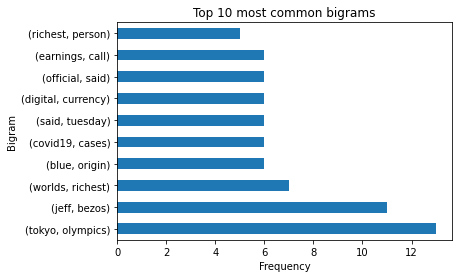

In [37]:
#visualize top ten
pd.Series(nltk.bigrams(news_df.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

(-0.5, 799.5, 599.5, -0.5)

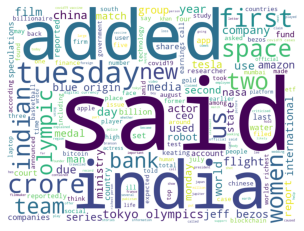

In [38]:
img = WordCloud(background_color='white', width=800, height=600).generate(news_df)
plt.imshow(img)
plt.axis('off')

<hr style="border:2px solid black"> </hr>

### Only entertainment and Sports

In [51]:
news.head()

,title,content,category
0,"Reliance Industries vaccinates 98% of workers,...",Reliance Industries has said in a statement th...,business
1,I will most likely not be on future earnings c...,Tesla CEO and the world's second-richest perso...,business
2,"Musk criticises Apple's 'walled garden', cobal...",Tesla's billionaire CEO Elon Musk criticised A...,business
3,Speculation around our plans for crypto not tr...,Amazon on Monday denied speculations that it w...,business
4,Factually incorrect: INOX on report of Amazon ...,INOX Leisure denied a report that claimed Amaz...,business


In [43]:
#applying clean function to get all normalized text in content column
ent_words = clean(' '.join(news[news.category == 'entertainment'].content))
sports_words = clean(' '.join(news[news.category == 'sports'].content))
all_words =  clean(' '.join(news.content))

In [45]:
all_words

'reliance industries has said in a statement that over 98 of its workers have received at least one dose of covid19 vaccine so far the billionaire mukesh ambaniled conglomerate had over 236 lakh employees of march 31 besides reliance hindustan unilever has also given at least one shot to 90 of employees while infosys inoculated 59 employees and tcs 70 tesla ceo and the worlds secondrichest person elon musk during his companys secondquarter earnings call on monday said i will no longer default to doing earnings call he added obviously ill do the annual shareholder meeting but i think that going forward ill most likely not be on earnings calls unless theres something really important that i need to say teslas billionaire ceo elon musk criticised apple twice during an earnings call that took place on monday in a reference to apple musk said teslas goal is to support sustainable energy not to create a walled garden used by some companies to bludgeon competitors he also explained that while

In [46]:
all_words.split()

['reliance',
 'industries',
 'has',
 'said',
 'in',
 'a',
 'statement',
 'that',
 'over',
 '98',
 'of',
 'its',
 'workers',
 'have',
 'received',
 'at',
 'least',
 'one',
 'dose',
 'of',
 'covid19',
 'vaccine',
 'so',
 'far',
 'the',
 'billionaire',
 'mukesh',
 'ambaniled',
 'conglomerate',
 'had',
 'over',
 '236',
 'lakh',
 'employees',
 'of',
 'march',
 '31',
 'besides',
 'reliance',
 'hindustan',
 'unilever',
 'has',
 'also',
 'given',
 'at',
 'least',
 'one',
 'shot',
 'to',
 '90',
 'of',
 'employees',
 'while',
 'infosys',
 'inoculated',
 '59',
 'employees',
 'and',
 'tcs',
 '70',
 'tesla',
 'ceo',
 'and',
 'the',
 'worlds',
 'secondrichest',
 'person',
 'elon',
 'musk',
 'during',
 'his',
 'companys',
 'secondquarter',
 'earnings',
 'call',
 'on',
 'monday',
 'said',
 'i',
 'will',
 'no',
 'longer',
 'default',
 'to',
 'doing',
 'earnings',
 'call',
 'he',
 'added',
 'obviously',
 'ill',
 'do',
 'the',
 'annual',
 'shareholder',
 'meeting',
 'but',
 'i',
 'think',
 'that',
 'goin

In [47]:
#turn all words into a series
#get value count of all words
pd.Series(all_words.split()).value_counts()

#removing stopwords would change this count

the             452
to              223
in              194
of              185
and             179
               ... 
jumped            1
civilisation      1
24356             1
popups            1
leaders           1
Length: 2882, dtype: int64

In [55]:
#remove stop words and create variable
news_nostop = prepare.remove_stopwords(all_words)
news_nostop

'reliance industries said statement 98 workers received least one dose covid19 vaccine far billionaire mukesh ambaniled conglomerate 236 lakh employees march 31 besides reliance hindustan unilever also given least one shot 90 employees infosys inoculated 59 employees tcs 70 tesla ceo worlds secondrichest person elon musk companys secondquarter earnings call monday said longer default earnings call added obviously ill annual shareholder meeting think going forward ill likely earnings calls unless theres something really important need say teslas billionaire ceo elon musk criticised apple twice earnings call took place monday reference apple musk said teslas goal support sustainable energy create walled garden used companies bludgeon competitors also explained apple uses almost 100 cobalt batteries tesla uses much lesser amazon monday denied speculations looking accept bitcoin cryptocurrencies form payment end year saying speculations true speculations regarding fuelled amazon job postin

In [57]:
#turn all words into a series
#get value count of all words except stopwords
pd.Series(news_nostop.split()).value_counts()

said       101
added       37
india       29
tuesday     27
first       23
          ... 
running      1
french       1
ursula       1
cancers      1
leaders      1
Length: 2769, dtype: int64

In [63]:
#remove stop words and create variable
ent_nostop = prepare.remove_stopwords(ent_words)

In [62]:
#remove stop words and create variable
sports_nostop = prepare.remove_stopwords(sports_words)

In [64]:
#get word frequency for all three (WITHOUT stop words)
ent_freq = pd.Series(ent_nostop.split()).value_counts()
sports_freq = pd.Series(sports_nostop.split()).value_counts()
all_freq = pd.Series(news_nostop.split()).value_counts()

In [65]:
#combine all frequency into single Series
word_counts = pd.concat([ent_freq, sports_freq, all_freq], axis=1).fillna(0).astype(int)

#word count for each text type
word_counts.columns = ['ent', 'sports', 'all']

#take a look
word_counts.head()

,ent,sports,all
said,16,13,101
film,9,0,10
added,9,10,37
actor,8,0,8
also,7,2,21


Text(0, 0.5, 'Word')

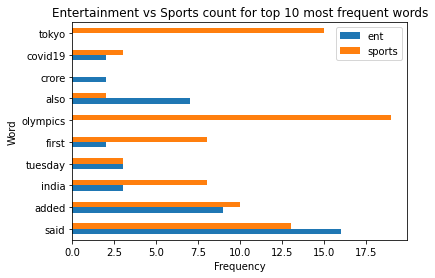

In [66]:
#using 'all' texts
#visualize top 20 of ham and spam
word_counts.sort_values('all', ascending=False).head(10)[['ent', 'sports']].plot.barh()

plt.title('Entertainment vs Sports count for top 10 most frequent words')
plt.xlabel('Frequency')
plt.ylabel('Word')

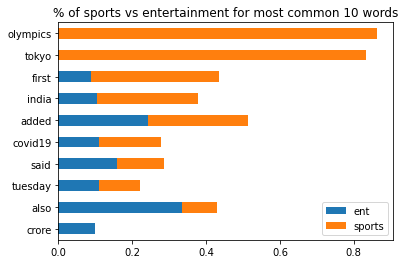

In [67]:
#visualize only ham and spam as percent of 'all'
(word_counts.sort_values(by='all', ascending=False)
 .head(10)
 .apply(lambda row: row/ row['all'],axis=1)
 .drop(columns='all')
 .sort_values(by='sports')
 .plot.barh(stacked=True))
plt.title('% of sports vs entertainment for most common 10 words')
None

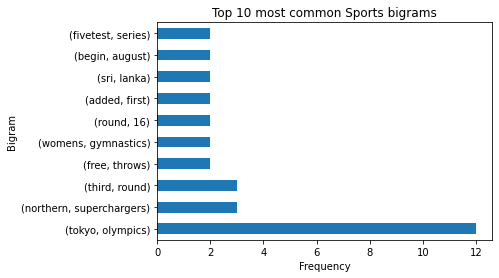

In [69]:
#visualize top ten in sports
pd.Series(nltk.bigrams(sports_nostop.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Sports bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

(-0.5, 799.5, 599.5, -0.5)

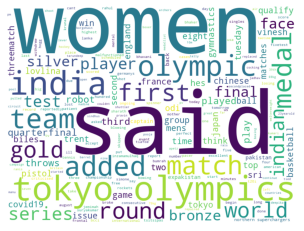

In [71]:
#visualize sports using word cloud (excludes all stopwords)
img = WordCloud(background_color='white', width=800, height=600).generate(sports_nostop)
plt.imshow(img)
plt.axis('off')

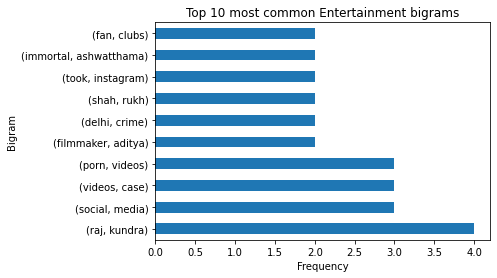

In [70]:
#visualize top ten in sports
pd.Series(nltk.bigrams(ent_nostop.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

(-0.5, 799.5, 599.5, -0.5)

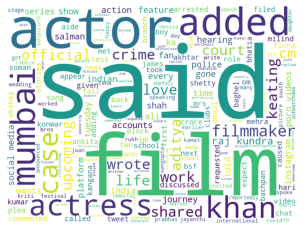

In [79]:
#visualize entertainment using word cloud (excludes all stopwords)
img = WordCloud(background_color='white', width=800, height=600).generate(ent_nostop)
plt.imshow(img)
plt.axis('off')

## Sentiment

In [73]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/natasharivers/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
import nltk.sentiment

In [75]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()